### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : bitconnect_price.csv 
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Reading Data

In [2]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/bitconnect_price.csv', parse_dates = ['Date'])
df1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,114.74,131.57,108.93,129.42,"8,537,600","756,793,000"
1,2017-09-04,128.26,129.55,110.68,114.13,"30,395,600","845,031,000"
2,2017-09-03,131.71,135.06,125.87,130.99,"5,244,490","866,869,000"
3,2017-09-02,141.11,142.80,128.00,131.33,"5,056,030","926,918,000"
4,2017-09-01,135.66,140.97,133.47,140.97,"7,854,700","890,229,000"


In [3]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# Set Date as it's index
df1.set_index('Date', inplace = True )

In [5]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 229 entries, 2017-09-05 to 2017-01-20
Data columns (total 6 columns):
Open          229 non-null float64
High          229 non-null float64
Low           229 non-null float64
Close         229 non-null float64
Volume        229 non-null object
Market Cap    229 non-null object
dtypes: float64(4), object(2)
memory usage: 12.5+ KB


- The data frame has 229 entries and 6 columns. 
- All columns has 229 elements, probably there's no missing data. Especially for Open, high, Low, and Close. To make it sure, We'll see for this
- Volume and Market Cap's data type are an object, it should be number.

In [6]:
# Replace missing data as NaN
df1.replace('-', np.nan,inplace=True)

In [7]:
# Count missing data in each column
df1.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

#### 2. Cleaning Data Part (Deal with Wrong Format)

Problem :
- Some data has different format, therefore Volume and Market Cap recognize as a string, not a number.

Solution:
- Convert to float number

In [8]:
print('Volume Data Type :', type(df1.Volume[0]))

Volume Data Type : <class 'str'>


In [9]:
#convert data to number
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df1.Volume = df1.Volume.apply(convert_to_number)
df1['Market Cap'] = df1['Market Cap'].apply(convert_to_number)

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 229 entries, 2017-09-05 to 2017-01-20
Data columns (total 6 columns):
Open          229 non-null float64
High          229 non-null float64
Low           229 non-null float64
Close         229 non-null float64
Volume        229 non-null int64
Market Cap    229 non-null int64
dtypes: float64(4), int64(2)
memory usage: 22.5 KB


In [10]:
df1.describe()

,Open,High,Low,Close,Volume,Market Cap
count,229.000000,229.000000,229.000000,229.000000,2.290000e+02,2.290000e+02
mean,33.210547,35.490599,31.128843,33.802779,2.030768e+06,2.152792e+08
std,38.957075,41.423524,36.480761,39.482488,3.041031e+06,2.541095e+08
min,0.128182,0.156983,0.123697,0.128067,5.260000e+02,6.417620e+05
25%,1.830000,1.990000,1.760000,1.860000,2.311930e+05,1.043130e+07
50%,10.070000,10.840000,9.700000,10.180000,7.376190e+05,6.253950e+07
75%,55.520000,58.860000,53.220000,55.530000,2.865970e+06,3.685020e+08
max,141.110000,149.890000,133.470000,140.970000,3.039560e+07,9.269180e+08


All Data is clear

#### 3. Data Visualization

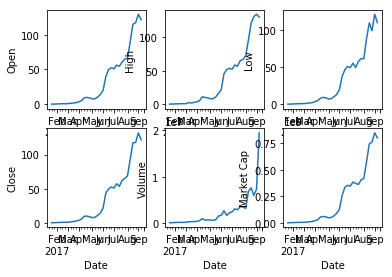

In [11]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df1.Open.resample('W').mean().plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df1.High.resample('W').mean().plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df1.Low.resample('W').mean().plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df1.Close.resample('W').mean().plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df1.Volume.resample('W').mean().plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df1['Market Cap'].resample('W').mean().plot()